In [30]:
import pandas as pd
import matplotlib.pyplot as plt

import subprocess

# Definisci il comando rsync
rsync_command = [
    "rsync", "-av",
    "l.rizzo11@spmcluster.unipi.it:~/SPM-assignment/assignment2/out/*", "./out"
]

# Esegui il comando
try:
    subprocess.run(rsync_command, check=True)
    print("✅ Sincronizzazione completata con successo!")
except subprocess.CalledProcessError as e:
    print(f"❌ Errore durante rsync: {e}")


NUM_RUNS = 3
# target, policy, chunk_size, num_threads, range, run1, run2, run3
num_cols = 5 + NUM_RUNS
benchmark_file = "./out/results2.csv"

col_names = ['Target', 'Policy', 'Chunk_size', 'Num_threads', 'Range'] + [f'run_{i+1}' for i in range(NUM_RUNS)]

df = pd.read_csv(benchmark_file, header=None, names=col_names)

run_cols = [f'run_{i+1}' for i in range(NUM_RUNS)]
df[run_cols] = df[run_cols].apply(pd.to_numeric, errors='coerce')
df['Chunk_size'] = pd.to_numeric(df['Chunk_size'], errors='coerce')
df['Num_threads'] = pd.to_numeric(df['Num_threads'], errors='coerce')
df['Average'] = df[run_cols].mean(axis=1)
df['Policy'] = df['Policy'].str.strip()
plain_avg = df[(df['Target'] == 'collatz_seq')]['Average'].values[0]
df['Speedup'] = plain_avg / df['Average']
df['Efficiency'] = df['Speedup'] / df['Num_threads']

df_filtered = df[
    (df['Target'] == 'collatz_par') 
][['Policy', 'Chunk_size', 'Num_threads', 'Average', 'Speedup']]

df_grouped = df_filtered.sort_values(by=['Policy', 'Speedup'], ascending=[True, False])
pd.set_option('display.max_rows', None)

display(df_grouped)


receiving incremental file list

sent 27 bytes  received 77 bytes  69.33 bytes/sec
total size is 13,937  speedup is 134.01
✅ Sincronizzazione completata con successo!


,Policy,Chunk_size,Num_threads,Average,Speedup
34,d,512.0,32.0,0.063243,20.608095
40,d,1024.0,40.0,0.063618,20.486802
39,d,1024.0,32.0,0.063662,20.472600
44,d,5000.0,32.0,0.064234,20.290356
35,d,512.0,40.0,0.064714,20.139857
45,d,5000.0,40.0,0.065303,19.958236
50,d,10000.0,40.0,0.065492,19.900396
29,d,128.0,32.0,0.065514,19.893824
49,d,10000.0,32.0,0.065713,19.833580
30,d,128.0,40.0,0.065734,19.827153


In [8]:
pivot = df_filtered.pivot_table(index='Policy', columns='Chunk_size', values='Speedup')

# Ordina le colonne per chunk size
pivot = pivot[sorted(pivot.columns)]

# Mostra la tabella
display(pivot)

Chunk_size,1.0,2.0,8.0,16.0,32.0,128.0,512.0,1024.0,5000.0,10000.0,50000.0
Policy,,,,,,,,,,,
d,0.772130,1.665181,5.918921,13.141562,18.195051,19.893824,20.608095,20.472600,20.290356,19.833580,16.593868
s,12.009018,12.654026,13.768287,14.734641,14.808023,15.945714,16.592911,16.904535,16.600301,16.394933,12.844200
t,0.082789,0.167529,0.678797,1.396878,2.766551,9.524619,18.733306,19.737405,19.979918,19.569362,15.221659


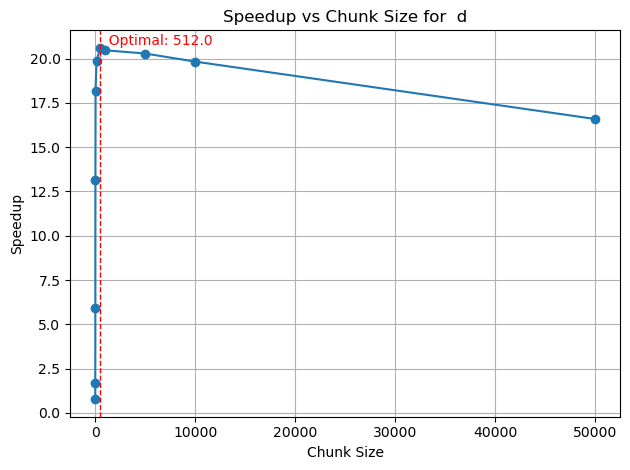

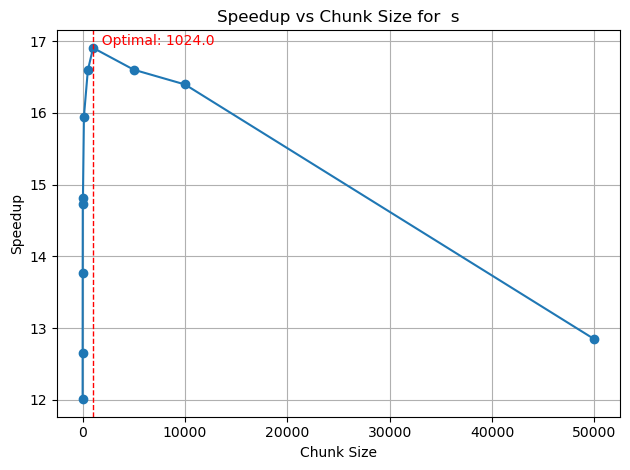

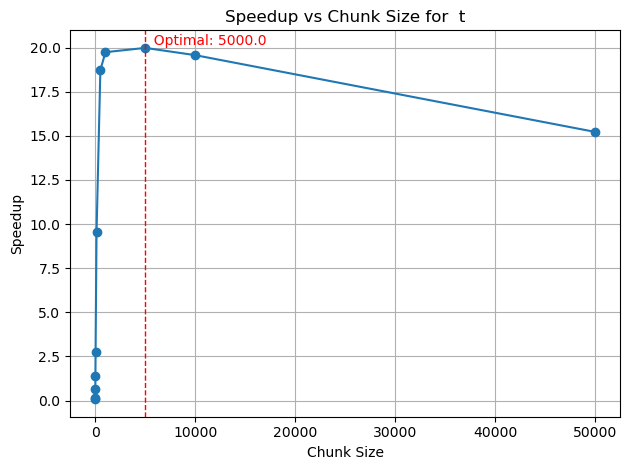

In [10]:
for policy in pivot.index:
    chunk_sizes = pivot.columns
    speedups = pivot.loc[policy]

    optimal_chunk_size = speedups.idxmax()
    max_speedup = speedups.max()

    plt.figure()
    plt.plot(chunk_sizes, speedups, marker='o')
    plt.axvline(x=optimal_chunk_size, color='red', linestyle='--', linewidth=1)
    plt.text(optimal_chunk_size, max_speedup, f'  Optimal: {optimal_chunk_size}', color='red', verticalalignment='bottom')
    
    plt.title(f"Speedup vs Chunk Size for {policy}")
    plt.xlabel("Chunk Size")
    plt.ylabel("Speedup")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

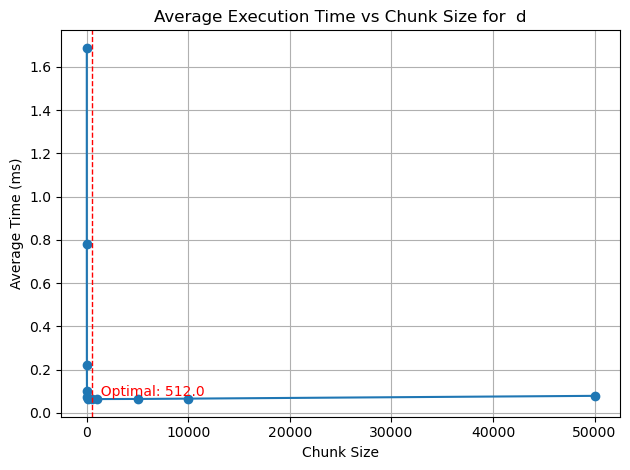

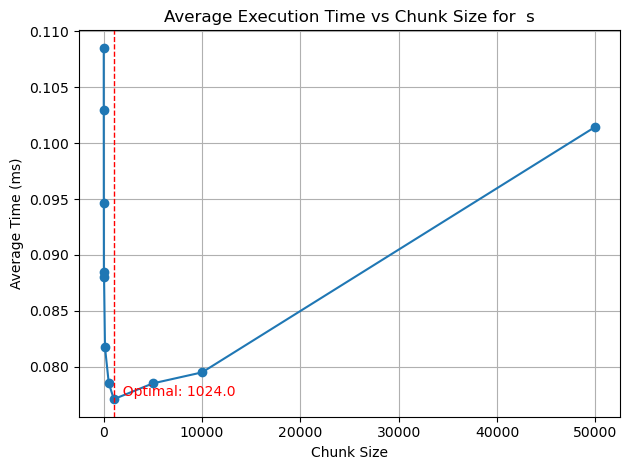

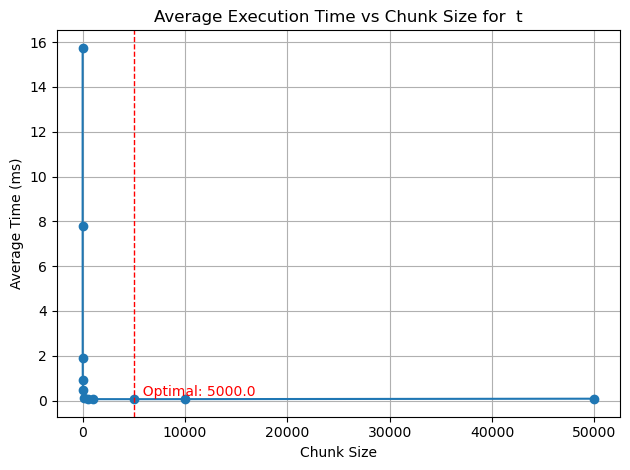

In [11]:
pivot_avg = df_filtered.pivot_table(index='Policy', columns='Chunk_size', values='Average')
pivot_avg = pivot_avg[sorted(pivot_avg.columns)]
# Grafici per ciascuna policy con evidenziazione del chunk size ottimale (min avg)
for policy in pivot_avg.index:
    chunk_sizes = pivot_avg.columns
    averages = pivot_avg.loc[policy]

    optimal_chunk_size = averages.idxmin()
    min_avg = averages.min()

    plt.figure()
    plt.plot(chunk_sizes, averages, marker='o')
    plt.axvline(x=optimal_chunk_size, color='red', linestyle='--', linewidth=1)
    plt.text(optimal_chunk_size, min_avg, f'  Optimal: {optimal_chunk_size}', color='red', verticalalignment='bottom')
    
    plt.title(f"Average Execution Time vs Chunk Size for {policy}")
    plt.xlabel("Chunk Size")
    plt.ylabel("Average Time (ms)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [29]:
# Pivot ed evidenziazione per ciascuna policy
pivot_tables = {}
styled_tables = {}

for policy in df['Policy'].unique():
    subset = df[(df['Target'] == 'collatz_par') & (df['Policy'] == policy)]
    pivot = subset.pivot_table(index='Num_threads', columns='Chunk_size', values='Speedup')
    pivot_tables[policy] = pivot
    styled_tables[policy] = pivot.style.highlight_max(axis=None, color='lightgreen')

display('Dynamic scheduling')
display(styled_tables['d'])
display('Dynamic scheduling with threadpool')
display(styled_tables['t'])
display('Static scheduling')
display(styled_tables['s'])

'Dynamic scheduling'

Chunk_size,1.000000,2.000000,8.000000,16.000000,32.000000,128.000000,512.000000,1024.000000,5000.000000,10000.000000,50000.000000
Num_threads,,,,,,,,,,,
4.000000,0.973000,1.986817,3.482053,3.693961,3.845030,3.930059,3.971184,3.986139,3.994479,3.981082,3.873024
8.000000,0.871509,1.590655,6.061082,7.074851,7.331506,7.574295,7.718767,7.758282,7.730732,7.664163,7.381569
16.000000,0.860571,1.529779,6.254827,11.239935,13.728120,14.681015,14.960916,15.116935,14.934909,14.798434,13.488304
32.000000,0.772130,1.665181,5.918921,13.141562,18.195051,19.893824,20.608095,20.472600,20.290356,19.833580,16.593868
40.000000,0.954187,1.842643,5.841467,12.116977,17.743279,19.827153,20.139857,20.486802,19.958236,19.900396,15.670069


'Dynamic scheduling with threadpool'

Chunk_size,1.000000,2.000000,8.000000,16.000000,32.000000,128.000000,512.000000,1024.000000,5000.000000,10000.000000,50000.000000
Num_threads,,,,,,,,,,,
4.000000,0.092921,0.207304,1.113954,1.967270,2.762364,3.386334,3.528035,3.550641,3.573434,3.590263,3.518963
8.000000,0.080927,0.166795,0.684748,1.341336,4.819526,6.632222,7.003505,6.917698,6.925908,6.890889,6.454711
16.000000,0.088187,0.171673,0.680279,1.444512,2.856750,11.997962,11.864135,12.572251,11.910830,11.434897,10.018962
32.000000,0.082789,0.167529,0.678797,1.396878,2.766551,9.524619,18.733306,19.737405,19.979918,19.569362,15.221659
40.000000,0.081838,0.170392,0.656417,1.401927,2.666093,8.774562,17.201878,18.470363,19.757811,19.212132,15.461024


'Static scheduling'

Chunk_size,1.000000,2.000000,8.000000,16.000000,32.000000,128.000000,512.000000,1024.000000,5000.000000,10000.000000,50000.000000
Num_threads,,,,,,,,,,,
4.000000,2.540373,2.617197,2.812703,2.955749,2.909551,2.999583,3.046169,3.060621,3.073495,3.058930,3.012794
8.000000,4.593470,4.803521,5.201613,5.484897,5.407501,5.793430,5.970903,6.036789,6.005034,5.977091,5.596022
16.000000,8.484831,8.864761,9.650149,10.288934,10.401013,11.220002,11.646169,11.852016,11.678485,11.523598,9.805125
32.000000,12.009018,12.654026,13.768287,14.734641,14.808023,15.945714,16.592911,16.904535,16.600301,16.394933,12.844200
40.000000,11.135388,11.574118,11.900317,12.273959,12.260373,12.786567,13.244710,13.100766,13.047001,13.003458,12.285335


In [31]:
# Pivot ed evidenziazione per ciascuna policy
pivot_tables = {}
styled_tables = {}

for policy in df['Policy'].unique():
    subset = df[(df['Target'] == 'collatz_par') & (df['Policy'] == policy)]
    pivot = subset.pivot_table(index='Num_threads', columns='Chunk_size', values='Efficiency')
    pivot_tables[policy] = pivot
    styled_tables[policy] = pivot.style.highlight_max(axis=None, color='lightgreen')

display('Dynamic scheduling')
display(styled_tables['d'])
display('Dynamic scheduling with threadpool')
display(styled_tables['t'])
display('Static scheduling')
display(styled_tables['s'])

'Dynamic scheduling'

Chunk_size,1.000000,2.000000,8.000000,16.000000,32.000000,128.000000,512.000000,1024.000000,5000.000000,10000.000000,50000.000000
Num_threads,,,,,,,,,,,
4.000000,0.243250,0.496704,0.870513,0.923490,0.961257,0.982515,0.992796,0.996535,0.998620,0.995271,0.968256
8.000000,0.108939,0.198832,0.757635,0.884356,0.916438,0.946787,0.964846,0.969785,0.966341,0.958020,0.922696
16.000000,0.053786,0.095611,0.390927,0.702496,0.858008,0.917563,0.935057,0.944808,0.933432,0.924902,0.843019
32.000000,0.024129,0.052037,0.184966,0.410674,0.568595,0.621682,0.644003,0.639769,0.634074,0.619799,0.518558
40.000000,0.023855,0.046066,0.146037,0.302924,0.443582,0.495679,0.503496,0.512170,0.498956,0.497510,0.391752


'Dynamic scheduling with threadpool'

Chunk_size,1.000000,2.000000,8.000000,16.000000,32.000000,128.000000,512.000000,1024.000000,5000.000000,10000.000000,50000.000000
Num_threads,,,,,,,,,,,
4.000000,0.023230,0.051826,0.278489,0.491817,0.690591,0.846584,0.882009,0.887660,0.893358,0.897566,0.879741
8.000000,0.010116,0.020849,0.085594,0.167667,0.602441,0.829028,0.875438,0.864712,0.865739,0.861361,0.806839
16.000000,0.005512,0.010730,0.042517,0.090282,0.178547,0.749873,0.741508,0.785766,0.744427,0.714681,0.626185
32.000000,0.002587,0.005235,0.021212,0.043652,0.086455,0.297644,0.585416,0.616794,0.624372,0.611543,0.475677
40.000000,0.002046,0.004260,0.016410,0.035048,0.066652,0.219364,0.430047,0.461759,0.493945,0.480303,0.386526


'Static scheduling'

Chunk_size,1.000000,2.000000,8.000000,16.000000,32.000000,128.000000,512.000000,1024.000000,5000.000000,10000.000000,50000.000000
Num_threads,,,,,,,,,,,
4.000000,0.635093,0.654299,0.703176,0.738937,0.727388,0.749896,0.761542,0.765155,0.768374,0.764733,0.753199
8.000000,0.574184,0.600440,0.650202,0.685612,0.675938,0.724179,0.746363,0.754599,0.750629,0.747136,0.699503
16.000000,0.530302,0.554048,0.603134,0.643058,0.650063,0.701250,0.727886,0.740751,0.729905,0.720225,0.612820
32.000000,0.375282,0.395438,0.430259,0.460458,0.462751,0.498304,0.518528,0.528267,0.518759,0.512342,0.401381
40.000000,0.278385,0.289353,0.297508,0.306849,0.306509,0.319664,0.331118,0.327519,0.326175,0.325086,0.307133
